<a href="https://colab.research.google.com/github/njwaamfdh/Tugas/blob/main/Case_Study_04_Kelompok_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Studi Kasus 4 Korelasi dan Regresi
# **GROUP H**
1. Azizah Annurohmah (2006572983)
2. Muhammad Ammar Daffa (2006571066)
3. Muhammad Jauhar Hakim (2006463982)
4. Najwa Mufidah (2006463931)
5. Natania Agustin (2006572895)
6. Nurrochmi Andina (2006571103)
7. Olivia Felica Utomo (2006464114)

## Import Module

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
plt.style.use('bmh'); sns.set()

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.model_selection import train_test_split

## Import Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv')
df.head()

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


Di dalam dataset terdapat rata-rata penggunaan energi listrik yang digunakan dalam suatu bagunan (meter_reading) dengan keterangan bangunan dan juga keterangan cuaca.

Keterangan Bangunan :
1. Primary Use (Kegunaan Utama)
2. Square Feet (Luas Bangunan)
3. Year Built  (Tahun Dibangun)
4. Floor Count (Jumlah Lantai)

Keterangan Cuaca :
1. Air Temperature (Suhu Udara)
2. Cloud Coverage  (Cakupan Awan)
3. Dew Temperature (Suhu Embun)
4. Precip Depth    (Kedalaman Endapan)
5. Sea Level Pressure (Tekanan Permukaan Laut)
6. Wind Direction (Arah Angin)
7. Wind Speed (Kecepatan Angin)

## EDA - Pre Processing

In [ ]:
# Melihat banyaknya data yang kosong dan tipe data tiap variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


In [ ]:
# Memeriksa nilai unik dari variabel kategorik primary_use
df['primary_use'].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

Terdapat tipe data yang tidak sesuai yaitu variabel primary_use, sehingga akan diganti tipe datanya menjadi kategori.

In [ ]:
# Mengganti tipe data variabel primary_use
df['primary_use'] = df['primary_use'].astype('category')

In [ ]:
# Memeriksa Jumlah Missing Value
df.isna().sum()

meter_reading            0
primary_use              0
square_feet              0
year_built             750
floor_count           1061
air_temperature          0
cloud_coverage          17
dew_temperature          0
precip_depth_1_hr      176
sea_level_pressure      89
wind_direction           0
wind_speed               0
dtype: int64

Terdapat banyak data yang kosong pada kolom year_built dan floor_count

In [ ]:
# Memeriksa nilai unik dari variabel floor_count untuk melihat apakah ada noise dari data variabel tersebut
print(df['floor_count'].unique())

[nan  5.  4. 10.  6.  8.  7.  9. 13. 16. 11. 12.  2.  3.  1. 14. 21. 26.
 19.]


Terlihat bahwa tidak ada data noise pada variabel floor_count

In [ ]:
# Drop kolom floor_count dan year_built karena terlalu banyak missing value
df.drop("floor_count", axis=1, inplace=True)
df.drop("year_built", axis=1, inplace=True)
df.head()

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [ ]:
#Drop duplicates
print(df.shape) #lihat shape
df.drop_duplicates()
print(df.shape) #recheck shape

(1413, 10)
(1413, 10)


Interpretasi:
Tidak terdapat data yang memiliki duplikat karena setelah drop duplikat, shape dari data tidak berubah.

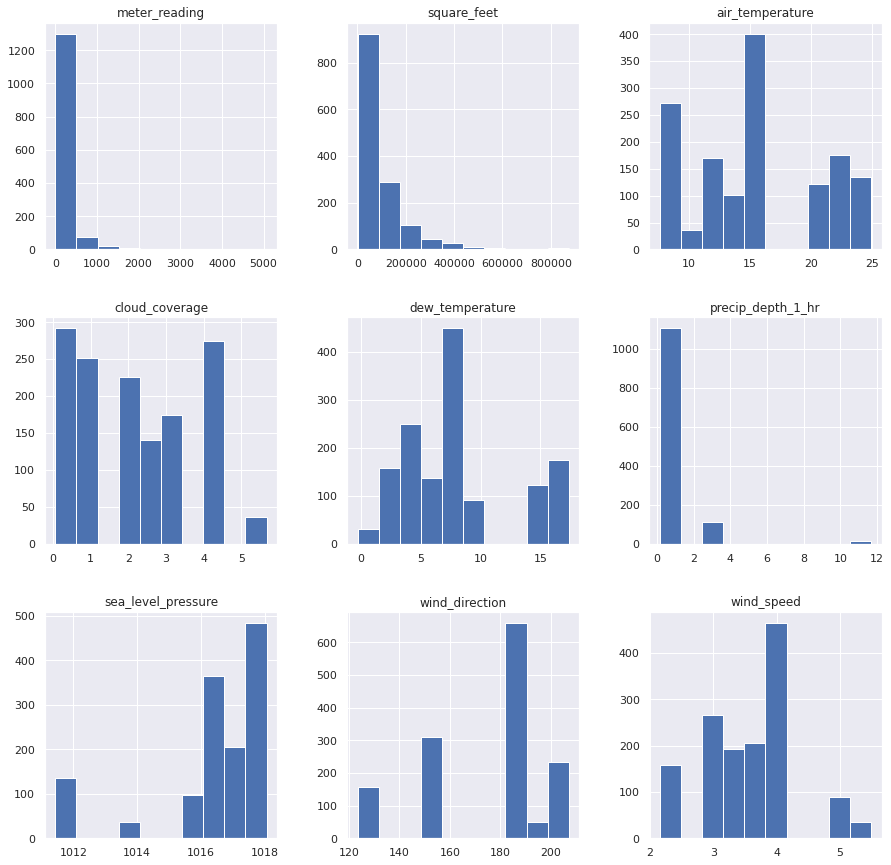

In [ ]:
### Memeriksa distribusi data
numerical = df.select_dtypes(include = ['int64','float64']).columns

df[numerical].hist(figsize=(15, 15));

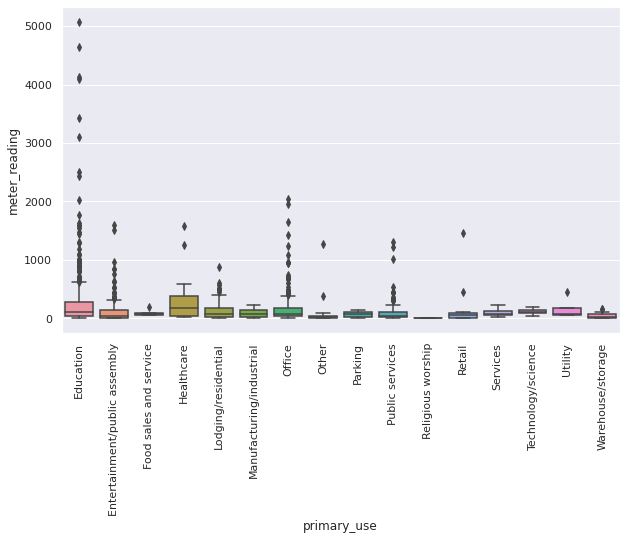

In [ ]:
#Outliers
plt.figure(figsize=(10,6))
sns.boxplot(x="primary_use",y="meter_reading",data=df)
plt.xticks(rotation='vertical')
plt.show()

Interpretasi:

Terdapat outlier variabel meter_reading (konsumsi energi) berdasarkan primary_use (kegunaan utama) hampir di semua jenis kegunaan, kecuali pada kegunaan bangunan untuk manufacturing/industrial, parking, religious worship, services, dan technology/science. Outlier terbanyak terdapat pada kategori education (pendidikan).

In [ ]:
# Menggantikan nilai kosong dengan median dari variabel tersebut
df.fillna(df.median(), inplace= True)

#### Note :
- Pada variabel `Primary_Use` awalnya merupakan objek dan diubah menjadi kategorik
- Pada variabel `floor_count` ditemukan banyak sekali missing value sehingga akan di drop kolomnya. Kami mendrop kolomnya karena setelah diperiksa nilai unik variabelnya tidak ada keanehan dan terdapat jumlah lantai yang nilainya bervariasi dari 1 hingga 26
- Pada variabel `year_built` ditemukan banyak missing value sehingga akan di drop kolomnya juga.
- Pada variabel `cloud_coverage`, `precip_depth_1_hr`, `sea_level_pressure` ditemukan beberapa missing value, setelah memeriksa distribusinya kami memutuskan untuk mengimputasi missing valuenya dengan median.
- Diperiksa juga apakah ada data yang duplikat dan ditemukan tidak adanya data duplikat
- Diperiksa juga outlier variabel `meter_reading` berdasarkan `primary_use` dengan outlier terbanyak ada pada kategori education (pendidikan).


## EDA -Visualisasi

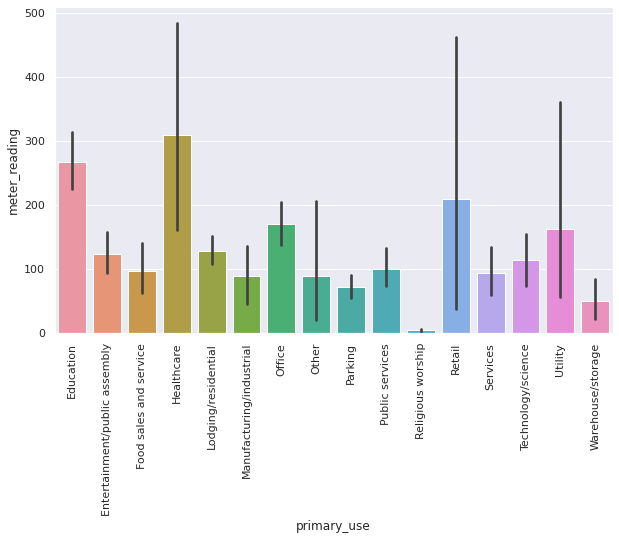

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='primary_use',y='meter_reading',data=df)
plt.xticks(rotation='vertical')
plt.show()

Interpretasi:

Bangunan yang memiliki konsumsi energi paling banyak adalah bangunan yang memiliki kegunaan utama untuk kesehatan, disusul oleh bangunan yang memiliki kegunaan utama untuk pendidikan, dan bangunan yang memiliki kegunaan utama untuk retail.

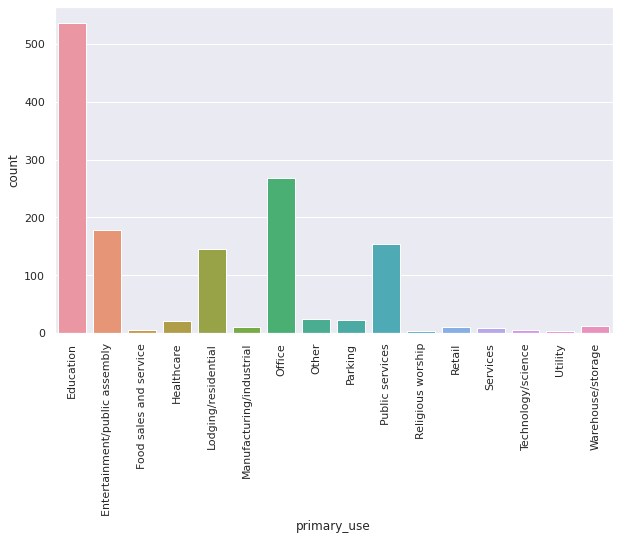

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='primary_use',data=df)
plt.xticks(rotation='vertical')
plt.show()

Interpretasi:

Bangunan paling banyak digunakan adalah bangunan yang bertujuan untuk aktivitas edukasi.

### Memeriksa Korelasi Data

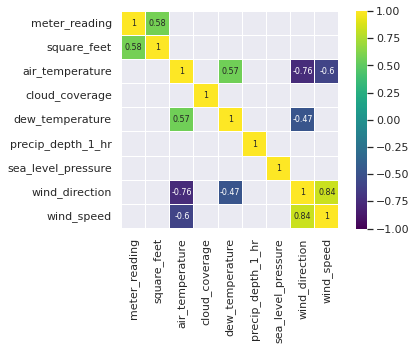

In [ ]:
# HeatMap untuk menyelidiki korelasi
corr2 = df.corr()
plt.figure()

sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Interpretasi:

- Didapatkan nilai 0,58 menunjukkan bahwa ada korelasi linier positif yang cukup kuat antara meter_reading (konsumsi energi) dengan square_feet (luas bangunan). Ada kecenderungan bahwa meter_reading (konsumsi energi) tinggi berkaitan dengan square_feet (luas bangunan) yang lebih luas dibandingkan dengan square_feet (luas bangunan) yang lebih sempit.

- Didapatkan nilai 0,57 menunjukkan bahwa ada korelasi linier positif yang cukup kuat antara air_temperature (suhu udara) dengan dew_temperature (suhu embun). Ada kecenderungan bahwa air_temperature (suhu udara) yang tinggi berkaitan dengan dew_temperature (suhu embun) yang tinggi dibandingkan dengan dew_temperature (suhu embun) yang rendah.

- Didapatkan nilai -0,76 menunjukkan bahwa ada korelasi linier negatif yang kuat antara wind_direction (arah angin) dengan air_temperature (suhu udara). Ada kecenderungan bahwa wind_direction (arah angin) yang tinggi berkaitan dengan air_temperature (suhu udara) yang rendah dibandingkan dengan air_temperature (suhu udara) yang tinggi.

- Didapatkan nilai -0,6 menunjukkan bahwa ada korelasi linier negatif yang kuat antara wind_speed (kecepatan angin) dengan air_temperature (suhu udara). Ada kecenderungan bahwa wind_speed (kecepatan angin) yang tinggi berkaitan dengan air_temperature (suhu udara) yang rendah dibandingkan dengan air_temperature (suhu udara) yang tinggi.

- Didapatkan nilai 0.84 menunjukkan bahwa ada korelasi linier positif yang sangat kuat antara wind_direction (arah angin) dengan wind_speed (kecepatan angin). Ada kecenderungan bahwa wind_direction (arah angin) yang tinggi berkaitan  dengan wind_speed (kecepatan angin) yang tinggi dibandingkan dengan wind_speed (kecepatan angin) yang rendah.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
meter_reading,1413.0,185.383188,374.899500,0.000400,27.224943,74.933148,182.884848,5072.323426
square_feet,1413.0,92204.792640,111412.340117,283.000000,22949.000000,57673.000000,115288.000000,875000.000000
air_temperature,1413.0,15.697154,5.416736,7.572136,11.058629,15.204244,21.325261,24.963702
cloud_coverage,1413.0,2.165621,1.452846,0.059266,0.665832,2.083712,2.998727,5.671785
dew_temperature,1413.0,8.259831,4.625295,-0.304675,4.512823,8.285693,9.834399,17.379328
precip_depth_1_hr,1413.0,1.151504,1.386802,0.155325,0.775686,0.895980,1.033215,11.675633
sea_level_pressure,1413.0,1016.487808,1.862148,1011.436563,1016.404579,1016.797495,1017.949437,1018.052063
wind_direction,1413.0,175.351051,24.921236,123.388701,153.629430,184.295922,187.301104,207.134076
wind_speed,1413.0,3.564617,0.737746,2.157103,3.100911,3.619547,3.905433,5.493939


## Modelling - Regression

In [ ]:
reg = ols('meter_reading ~ primary_use + square_feet + air_temperature', df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     51.73
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.07e-134
Time:                        08:51:44   Log-Likelihood:                -10033.
No. Observations:                1413   AIC:                         2.010e+04
Df Residuals:                    1395   BIC:                         2.020e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
#forward selection
def forward_selected(data, response):
    """Linear model designed by forward selection.
    https://planspace.org/20150423-forward_selection_with_statsmodels/
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
#memilih variable menggunakan forward selection (tanpa scaling)
model = forward_selected(df, 'meter_reading')

print(model.model.formula)
print(model.rsquared_adj)

meter_reading ~ square_feet + precip_depth_1_hr + primary_use + air_temperature + wind_direction + cloud_coverage + dew_temperature + wind_speed + 1
0.48611497260007974


In [ ]:
#model regresi berdasarkan forward selection tanpa scaling
reg2 = ols('meter_reading ~ square_feet + precip_depth_1_hr + primary_use + air_temperature + wind_speed + dew_temperature + sea_level_pressure', df).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     63.71
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          3.15e-186
Time:                        08:51:44   Log-Likelihood:                -9902.7
No. Observations:                1413   AIC:                         1.985e+04
Df Residuals:                    1391   BIC:                         1.997e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df3=df.copy()
df3[['square_feet','precip_depth_1_hr','air_temperature','wind_speed','dew_temperature','sea_level_pressure','cloud_coverage','wind_direction']] = scaler.fit_transform(df[['square_feet','precip_depth_1_hr','air_temperature','wind_speed','dew_temperature','sea_level_pressure','cloud_coverage','wind_direction']])
df3.head()

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,0.008173,0.872416,0.523733,1.0,0.094204,0.984487,0.347868,0.369922
1,118.553743,Education,0.002786,0.872416,0.523733,1.0,0.094204,0.984487,0.347868,0.369922
2,23.626500,Education,0.005822,0.872416,0.523733,1.0,0.094204,0.984487,0.347868,0.369922
3,382.736016,Education,0.026754,0.872416,0.523733,1.0,0.094204,0.984487,0.347868,0.369922
4,1579.174237,Education,0.132985,0.872416,0.523733,1.0,0.094204,0.984487,0.347868,0.369922


In [ ]:
model1 = forward_selected(df3, 'meter_reading')
res = ols(formula='meter_reading ~ square_feet + C(primary_use) + precip_depth_1_hr + air_temperature + wind_direction + sea_level_pressure', data=df).fit()
print(res.params)
print(res.summary())
print(model1.model.formula)
print(model1.rsquared_adj)

Intercept                                         -9454.549302
C(primary_use)[T.Entertainment/public assembly]     -86.818734
C(primary_use)[T.Food sales and service]             19.867383
C(primary_use)[T.Healthcare]                         25.714355
C(primary_use)[T.Lodging/residential]               -99.008211
C(primary_use)[T.Manufacturing/industrial]           -6.835465
C(primary_use)[T.Office]                            -17.737791
C(primary_use)[T.Other]                             -42.235958
C(primary_use)[T.Parking]                          -513.172801
C(primary_use)[T.Public services]                   -90.580734
C(primary_use)[T.Religious worship]                -102.954413
C(primary_use)[T.Retail]                             56.543394
C(primary_use)[T.Services]                         -311.832930
C(primary_use)[T.Technology/science]                -12.383264
C(primary_use)[T.Utility]                            -2.768447
C(primary_use)[T.Warehouse/storage]                 -75

In [ ]:
#model regresi berdasarkan forward selection dari data yang telah discaling
reg3 = ols('meter_reading ~ square_feet + precip_depth_1_hr + primary_use + air_temperature + wind_direction + cloud_coverage + dew_temperature + wind_speed + 1', df3).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     61.71
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.42e-187
Time:                        08:51:45   Log-Likelihood:                -9897.4
No. Observations:                1413   AIC:                         1.984e+04
Df Residuals:                    1390   BIC:                         1.996e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

#### Interpretasi

Berdasarkan AIC terkecil, maka akan digunakan model regresi ke 3 (reg3) untuk diinterpretasi.

Didapatkan model sebagai berikut :

meter_reading = -270.2282 - 86.4163entertaiment + 20.0898food sales + 24.3785healthcare - 97.4012lodging - 0.7396manufacturing - 19.769office - 44.6585other - 516.4284parking - 97.6886publicservices - 104.1349religiworship + 38.0838retail - 315.6918services - 21.5298technology + 0.281utility - 84.1486warehouse + 1699.4099square_feet + 1069.5608precip + 192.1951air_temperature + 180.0827wind_direction + 93.2140cloud_coverage + 71.0731dew_temperature - 94.4224windspeed

beberapa contoh interpretasi parameternya : 

1. Apabila kegunaan bangunannya adalah entertaiment maka konsumsi energi (meter_reading) berkurang sebanyak 86.4163 kWh (interpretasi yg lain serupa).

undefined. Dengan asumsi variabel selain air_temperature konstan, maka konsumsi energi listrik (meter_reading) bertambah sebanyak 192.195 kWh. Hal yang sama juga terjadi dengan variabel lainnya yang memiliki koefisien positif.

undefined. Dengan asumsi variabel selain wind_speed konstan, maka konsumsi energi listrik (meter_reading) bertambah sebanyak 94.4224 kWh. Hal yang sama juga terjadi dengan variabel lainnya yang memiliki koefisien negatif.

1. Diasumsikan variabel selain primary_use konstan, Kategori primary_use yang paling berpengaruh dalam rata-rata penggunaan energi adalah tempat parkir (T.Parking) dan service (T.Service). Kedua jenis bangunan ini berpotensi mengurangi rata-rata penggunaan energi bangunan. Dengan kata lain, kedua jenis bangunan ini menggunakan listrik lebih sedikit daripada jenis-jenis bangunan lainnya.

undefined. Diasumsikan variabel selain square_feet konstan, maka meter_reading bertambah sebanyak 1699.4099 kWh. Berarti luas bangunan sangat mempengaruhi rata-rata penggunaan energi listrik suatu bangunan. Hal ini dapat terjadi karena beberapa kemungkinan, misal semakin luas bangunan (terutama bangunan tertutup), semakin banyak juga pencahayaan (lampu, dll) yang diperlukan. Selain itu, bangunan tertutup juga memerlukan banyak AC, terutama di perkotaan, untuk sirkulasi udara. 

### Kesimpulan:
* Dari segi kualitas data, terdapat tipe data yang tidak sesuai yaitu tipe data variabel primary_use bertipe object yang seharusnya bertipe kategori, pada variabel floor_count dan year_built ditemukan banyak sekali missing value sehingga kolomnya di drop.
* Tidak terdapat data yang duplikat.
* Setelah diperiksa outlier variabel meter_reading berdasarkan primary_use, outlier terbanyak ada pada kategori education (pendidikan).
* Bangunan yang memiliki konsumsi energi paling banyak adalah bangunan dengan kegunaan utama untuk kesehatan, disusul oleh bangunan yang memiliki kegunaan utama untuk pendidikan, dan bangunan yang memiliki kegunaan utama untuk retail.
* Bangunan yang paling banyak digunakan adalah bangunan dengan tujuan aktivitas edukasi.
* Meter_reading (konsumsi energi) memiliki korelasi linier positif yang cukup kuat dengan square_feet (luas bangunan), yaitu 0,58. Dapat diinterpretasikan bahwa ada kecenderungan bahwa meter_reading (konsumsi energi) tinggi berkaitan dengan square_feet (luas bangunan) yang lebih luas dibandingkan dengan square_feet (luas bangunan) yang lebih sempit.

### Rekomendasi:
* Untuk bangunan yang merupakan fasilitas umum dan menggunakan konsumsi energi di atas rata-rata (outlier pada kategori primary use) sebaiknya dilakukan sosialisasi terhadap pihak terkait untuk melakukan aksi hemat energi.
* Melakukan pengarahan terhadap pihak yang akan membuat bangunan di masa depan untuk lokasi bangunan sebaiknya lebih diperhatikan lagi karena variabel wind_direction signifikan yang berarti bangunan yang berhadapan dengan angin atau tidak bisa berpengaruh pada penggunaan energi.
* Pendirian bangunan sebaiknya menghindari lokasi yang berangin kencang. Hal ini dikarenakan, angin kencang dapat meningkatkan risiko terjadinya masalah sistem listrik, seperti tiang listrik rubuh, listrik korslet, dan kabel kusut. 
* Jika lokasi bangunan luas dan memiliki tanah terbuka yang besar, kami merekomendasikan untuk mendirikan turbin angin yang dapat menghasilkan energi listrik sehingga konsumsi bangunan tidak bergantung pada energi listrik dari fosil.

### Referensi

https://energyeducation.ca/encyclopedia/Wind_power

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3de7a0f0-ff24-4715-89ca-acd1ae05c009' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>